In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("DCPropertiestrimmed.csv")

In [3]:
df.head() # Prints first n rows of the DataFrame


,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,3.0,0.0,N,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.0,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254.0,-77.006347,38.821799,SW
1,2.0,1.0,N,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.0,...,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,Ward 2,1269.0,-77.060458,38.909944,NW
2,5.0,2.0,Y,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.0,...,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,Ward 5,3127.0,-77.010605,38.921832,NW
3,2.0,0.0,Y,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.0,...,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,Ward 1,2860.0,-77.030711,38.925399,NW
4,3.0,0.0,Y,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.0,...,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,Ward 5,3112.0,-77.010980,38.916722,NW


In [4]:
df.info() # Index, Datatype and Memory information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 45 columns):
BATHRM                28870 non-null float64
HF_BATHRM             28870 non-null float64
AC                    28870 non-null object
NUM_UNITS             28870 non-null float64
ROOMS                 28870 non-null float64
BEDRM                 28870 non-null float64
AYB                   28870 non-null float64
YR_RMDL               28870 non-null float64
EYB                   28870 non-null float64
STORIES               28870 non-null float64
SALEDATE              28870 non-null object
PRICE                 28870 non-null float64
QUALIFIED             28870 non-null object
SALE_NUM              28870 non-null float64
GBA                   28870 non-null float64
BLDG_NUM              28870 non-null float64
STYLE                 28870 non-null object
STRUCT                28870 non-null object
GRADE                 28870 non-null object
CNDTN                 28870 non-null objec

In [5]:
df['PRICE'].describe() # Summary statistics for numerical columns

count    2.887000e+04
mean     6.547855e+05
std      6.043496e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

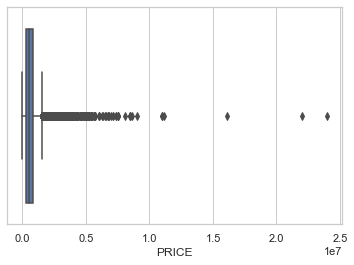

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["PRICE"])

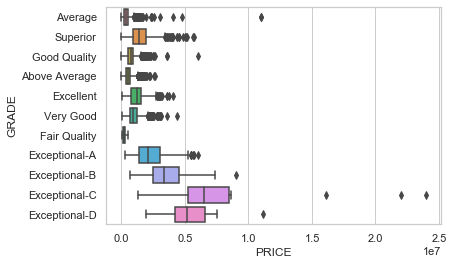

In [7]:
ax = sns.boxplot(x= df['PRICE'], y=df['GRADE'], data=df)

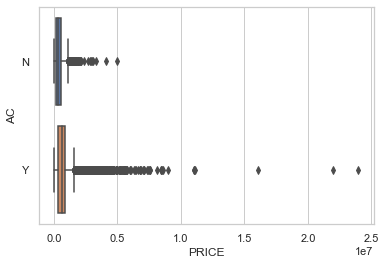

In [8]:
ax = sns.boxplot(x= df['PRICE'], y=df['AC'], data=df)

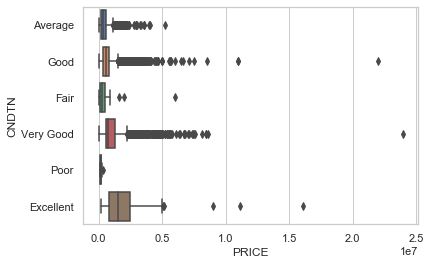

In [9]:
ax = sns.boxplot(x= df['PRICE'], y=df['CNDTN'], data=df)

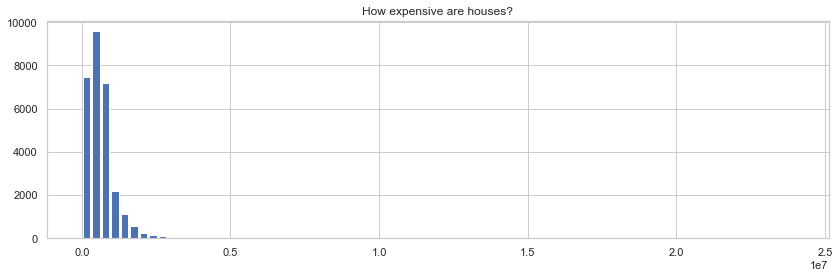

In [10]:
df['PRICE'].hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.xscale('linear')
plt.show()

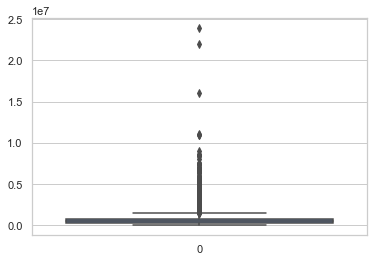

In [11]:
sns.boxplot(data= df['PRICE'])

In [12]:
newAC = df['AC'].replace(to_replace=['N', 'Y'], value=[0, 1])

In [13]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [14]:
dfn = remove_outlier(df,'PRICE')

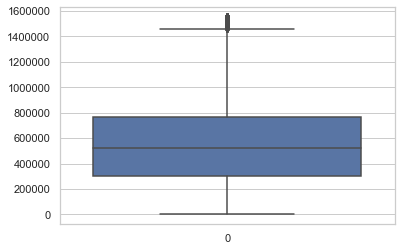

In [15]:
sns.boxplot(data= dfn['PRICE'])

In [16]:
df2=pd.DataFrame(newAC)

In [17]:
df['AC']= df2['AC']

In [18]:
df['AC']

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
28895    1.0
28896    1.0
28897    1.0
28898    1.0
28899    1.0
Name: AC, Length: 28900, dtype: float64

In [19]:
dfn=df

In [20]:
dfn

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,3.0,0.0,0.0,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254.0,-77.006347,38.821799,SW
1,2.0,1.0,0.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,...,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,Ward 2,1269.0,-77.060458,38.909944,NW
2,5.0,2.0,1.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,...,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,Ward 5,3127.0,-77.010605,38.921832,NW
3,2.0,0.0,1.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,...,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,Ward 1,2860.0,-77.030711,38.925399,NW
4,3.0,0.0,1.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,...,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,Ward 5,3112.0,-77.010980,38.916722,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,1.0,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,...,-76.955864,Fort Dupont Park,022 A Fort Dupont Park,7703.0,007703 3001,Ward 7,5440.0,-76.955396,38.884071,SE
28896,8.0,2.0,1.0,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,...,-77.064529,Georgetown,025 F Georgetown,100.0,000100 1005,Ward 2,1280.0,-77.064610,38.911993,NW
28897,9.0,4.0,1.0,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,...,-77.062194,Georgetown,025 F Georgetown,100.0,000100 1002,Ward 2,1282.0,-77.060462,38.911769,NW
28898,6.0,5.0,1.0,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,...,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,Ward 2,1285.0,-77.056614,38.910861,NW


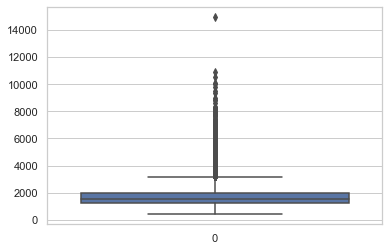

In [21]:
sns.boxplot(data= df['GBA'])

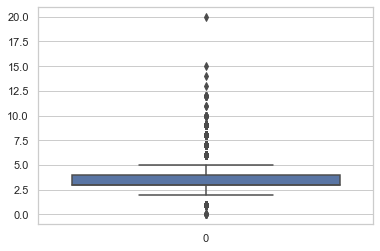

In [22]:
sns.boxplot(data= dfn['BEDRM'])

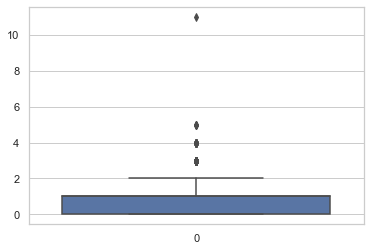

In [23]:
sns.boxplot(data= dfn['HF_BATHRM'])

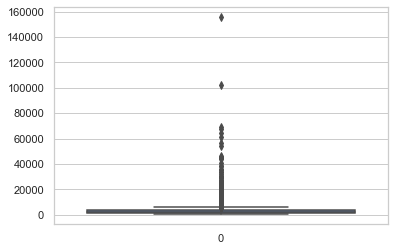

In [24]:
sns.boxplot(data= dfn['LANDAREA'])

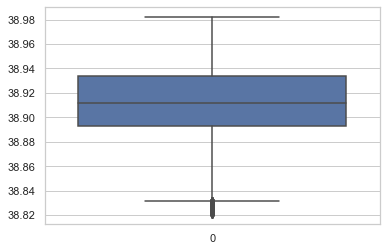

In [25]:
sns.boxplot(data= dfn['Y'])

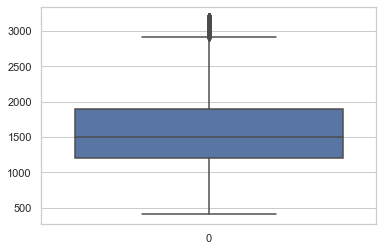

In [26]:
dfn = remove_outlier(df,'GBA')
sns.boxplot(data= dfn['GBA'])

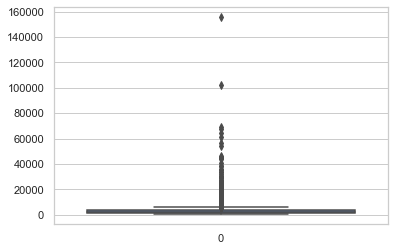

In [27]:
dfn = remove_outlier(df,'LANDAREA')
sns.boxplot(data= df['LANDAREA'])


In [28]:
dfn['CNDTN']

1          Average
2          Average
3          Average
4             Good
5          Average
           ...    
28884    Very Good
28887    Very Good
28889    Very Good
28894         Good
28895         Good
Name: CNDTN, Length: 26599, dtype: object

In [29]:
def cndtn_to_numeric(x):
    if x=='Excellent':
        return 6
    if x=='Very Good':
        return 5
    if x=='Good':
        return 4
    if x=='Fair':
        return 3
    if x=='Average':
        return 2
    if x=='Poor':
        return 1

In [30]:
df['CNDTN'] = df['CNDTN'].apply(cndtn_to_numeric)

In [31]:
dfn=df

In [32]:
dfn['PRICE'].describe()

count    2.887000e+04
mean     6.547855e+05
std      6.043496e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

In [33]:
dfn['CNDTN']

0        2.0
1        2.0
2        2.0
3        2.0
4        4.0
        ... 
28895    4.0
28896    6.0
28897    6.0
28898    4.0
28899    5.0
Name: CNDTN, Length: 28900, dtype: float64

In [34]:
import matplotlib.pyplot as plt


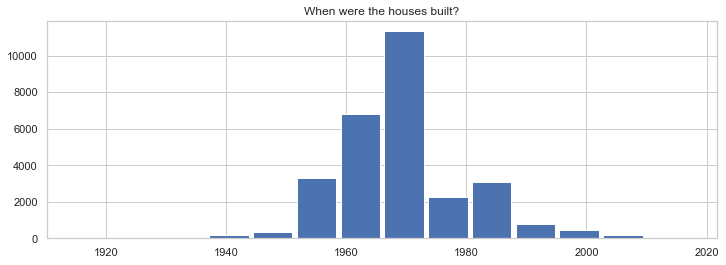

In [35]:
dfn['EYB'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

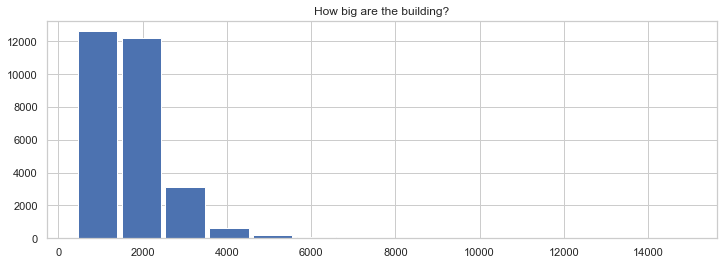

In [36]:
dfn['GBA'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('How big are the building?')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
preddf = [dfn['PRICE'], dfn['BATHRM'],dfn['BEDRM'], dfn['HF_BATHRM'],dfn['LANDAREA'],dfn['CNDTN'],dfn['Y'],dfn['FIREPLACES'], dfn['AC'], dfn['ROOMS'], dfn['GBA'], dfn['EYB']]

In [39]:
preddf=pd.DataFrame(preddf)

In [40]:
preddf

,0,1,2,3,4,5,6,7,8,9,...,28890,28891,28892,28893,28894,28895,28896,28897,28898,28899
PRICE,1.000000,10.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0000,500.000000,...,8.450000e+06,8.500000e+06,8.600000e+06,9.000000e+06,1.100000e+07,1.100000e+07,1.111111e+07,1.610000e+07,2.200000e+07,2.396029e+07
BATHRM,3.000000,2.000000,5.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.0000,4.000000,...,8.000000e+00,8.000000e+00,7.000000e+00,7.000000e+00,4.000000e+00,4.000000e+00,8.000000e+00,9.000000e+00,6.000000e+00,7.000000e+00
BEDRM,6.000000,3.000000,6.000000,6.000000,5.000000,5.000000,3.000000,2.000000,2.0000,4.000000,...,6.000000e+00,9.000000e+00,9.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00,1.200000e+01
HF_BATHRM,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,...,4.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00
LANDAREA,7811.000000,2400.000000,2520.000000,2853.000000,1152.000000,2417.000000,2700.000000,1040.000000,2216.0000,1170.000000,...,1.350000e+04,2.658000e+04,9.300000e+03,1.001800e+04,4.116000e+03,3.504000e+03,1.274900e+04,1.635300e+04,1.559050e+05,6.888000e+04
CNDTN,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,2.0000,2.000000,...,5.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,4.000000e+00,5.000000e+00
Y,38.821799,38.909944,38.921832,38.925399,38.916722,38.928395,38.923015,38.897706,38.8642,38.916317,...,3.891747e+01,3.891094e+01,3.890817e+01,3.891679e+01,3.888407e+01,3.888407e+01,3.891199e+01,3.891177e+01,3.891086e+01,3.890999e+01
FIREPLACES,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.0000,0.000000,...,4.000000e+00,6.000000e+00,1.200000e+01,5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,4.000000e+00,6.000000e+00
AC,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ROOMS,14.000000,8.000000,10.000000,9.000000,9.000000,8.000000,8.000000,8.000000,5.0000,8.000000,...,1.200000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.600000e+01,1.600000e+01,1.400000e+01,1.900000e+01,1.700000e+01,3.100000e+01


In [41]:
preddf = preddf.transpose()

In [42]:
preddf

,PRICE,BATHRM,BEDRM,HF_BATHRM,LANDAREA,CNDTN,Y,FIREPLACES,AC,ROOMS,GBA,EYB
0,1.0,3.0,6.0,0.0,7811.0,2.0,38.821799,0.0,0.0,14.0,2150.0,1971.0
1,10.0,2.0,3.0,1.0,2400.0,2.0,38.909944,0.0,0.0,8.0,2272.0,1976.0
2,250.0,5.0,6.0,2.0,2520.0,2.0,38.921832,0.0,1.0,10.0,2596.0,1975.0
3,250.0,2.0,6.0,0.0,2853.0,2.0,38.925399,0.0,1.0,9.0,2990.0,1960.0
4,250.0,3.0,5.0,0.0,1152.0,4.0,38.916722,1.0,1.0,9.0,1462.0,1963.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28895,11000000.0,4.0,4.0,0.0,3504.0,4.0,38.884071,0.0,1.0,16.0,3400.0,1964.0
28896,11111111.0,8.0,8.0,2.0,12749.0,6.0,38.911993,2.0,1.0,14.0,6937.0,2000.0
28897,16100000.0,9.0,9.0,4.0,16353.0,6.0,38.911769,7.0,1.0,19.0,7910.0,2000.0
28898,22000000.0,6.0,9.0,5.0,155905.0,4.0,38.910861,4.0,1.0,17.0,10110.0,1986.0


In [43]:
x = preddf[['BATHRM', 'BEDRM','HF_BATHRM','LANDAREA','CNDTN','Y','FIREPLACES','AC','ROOMS','GBA','EYB' ]]
y = preddf['PRICE']

In [45]:
x

,BATHRM,BEDRM,HF_BATHRM,LANDAREA,CNDTN,Y,FIREPLACES,AC,ROOMS,GBA,EYB
0,3.0,6.0,0.0,7811.0,2.0,38.821799,0.0,0.0,14.0,2150.0,1971.0
1,2.0,3.0,1.0,2400.0,2.0,38.909944,0.0,0.0,8.0,2272.0,1976.0
2,5.0,6.0,2.0,2520.0,2.0,38.921832,0.0,1.0,10.0,2596.0,1975.0
3,2.0,6.0,0.0,2853.0,2.0,38.925399,0.0,1.0,9.0,2990.0,1960.0
4,3.0,5.0,0.0,1152.0,4.0,38.916722,1.0,1.0,9.0,1462.0,1963.0
...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,4.0,0.0,3504.0,4.0,38.884071,0.0,1.0,16.0,3400.0,1964.0
28896,8.0,8.0,2.0,12749.0,6.0,38.911993,2.0,1.0,14.0,6937.0,2000.0
28897,9.0,9.0,4.0,16353.0,6.0,38.911769,7.0,1.0,19.0,7910.0,2000.0
28898,6.0,9.0,5.0,155905.0,4.0,38.910861,4.0,1.0,17.0,10110.0,1986.0


In [46]:
y

0               1.0
1              10.0
2             250.0
3             250.0
4             250.0
            ...    
28895    11000000.0
28896    11111111.0
28897    16100000.0
28898    22000000.0
28899    23960287.0
Name: PRICE, Length: 28900, dtype: float64

In [48]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [49]:
x_train

,BATHRM,BEDRM,HF_BATHRM,LANDAREA,CNDTN,Y,FIREPLACES,AC,ROOMS,GBA,EYB
21949,3.0,3.0,1.0,5000.0,4.0,38.959932,2.0,1.0,9.0,1992.0,1976.0
10371,2.0,4.0,0.0,1150.0,4.0,38.904712,0.0,1.0,8.0,1722.0,1967.0
20121,3.0,3.0,0.0,926.0,4.0,38.891602,1.0,1.0,8.0,1689.0,1980.0
25067,1.0,3.0,1.0,1646.0,4.0,38.884834,1.0,1.0,8.0,1636.0,1969.0
10642,1.0,3.0,0.0,1760.0,4.0,38.966718,1.0,0.0,7.0,1054.0,1967.0
...,...,...,...,...,...,...,...,...,...,...,...
5695,1.0,3.0,0.0,2420.0,5.0,38.830307,0.0,1.0,6.0,1024.0,1969.0
8006,2.0,5.0,1.0,5000.0,2.0,38.927022,1.0,1.0,8.0,1824.0,1972.0
17745,4.0,3.0,1.0,2040.0,5.0,38.955059,1.0,1.0,8.0,1533.0,1986.0
17931,1.0,2.0,1.0,1066.0,4.0,38.890457,1.0,1.0,6.0,1040.0,1964.0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
x_train

,BATHRM,BEDRM,HF_BATHRM,LANDAREA,CNDTN,Y,FIREPLACES,AC,ROOMS,GBA,EYB
21949,3.0,3.0,1.0,5000.0,4.0,38.959932,2.0,1.0,9.0,1992.0,1976.0
10371,2.0,4.0,0.0,1150.0,4.0,38.904712,0.0,1.0,8.0,1722.0,1967.0
20121,3.0,3.0,0.0,926.0,4.0,38.891602,1.0,1.0,8.0,1689.0,1980.0
25067,1.0,3.0,1.0,1646.0,4.0,38.884834,1.0,1.0,8.0,1636.0,1969.0
10642,1.0,3.0,0.0,1760.0,4.0,38.966718,1.0,0.0,7.0,1054.0,1967.0
...,...,...,...,...,...,...,...,...,...,...,...
5695,1.0,3.0,0.0,2420.0,5.0,38.830307,0.0,1.0,6.0,1024.0,1969.0
8006,2.0,5.0,1.0,5000.0,2.0,38.927022,1.0,1.0,8.0,1824.0,1972.0
17745,4.0,3.0,1.0,2040.0,5.0,38.955059,1.0,1.0,8.0,1533.0,1986.0
17931,1.0,2.0,1.0,1066.0,4.0,38.890457,1.0,1.0,6.0,1040.0,1964.0


In [53]:
x_train.dropna()

,BATHRM,BEDRM,HF_BATHRM,LANDAREA,CNDTN,Y,FIREPLACES,AC,ROOMS,GBA,EYB
21949,3.0,3.0,1.0,5000.0,4.0,38.959932,2.0,1.0,9.0,1992.0,1976.0
10371,2.0,4.0,0.0,1150.0,4.0,38.904712,0.0,1.0,8.0,1722.0,1967.0
20121,3.0,3.0,0.0,926.0,4.0,38.891602,1.0,1.0,8.0,1689.0,1980.0
25067,1.0,3.0,1.0,1646.0,4.0,38.884834,1.0,1.0,8.0,1636.0,1969.0
10642,1.0,3.0,0.0,1760.0,4.0,38.966718,1.0,0.0,7.0,1054.0,1967.0
...,...,...,...,...,...,...,...,...,...,...,...
5695,1.0,3.0,0.0,2420.0,5.0,38.830307,0.0,1.0,6.0,1024.0,1969.0
8006,2.0,5.0,1.0,5000.0,2.0,38.927022,1.0,1.0,8.0,1824.0,1972.0
17745,4.0,3.0,1.0,2040.0,5.0,38.955059,1.0,1.0,8.0,1533.0,1986.0
17931,1.0,2.0,1.0,1066.0,4.0,38.890457,1.0,1.0,6.0,1040.0,1964.0


In [54]:
y_train

21949     825000.0
10371     400000.0
20121     749000.0
25067    1050000.0
10642     410000.0
           ...    
5695      265000.0
8006      335000.0
17745     660000.0
17931     669000.0
13151     500000.0
Name: PRICE, Length: 20230, dtype: float64

In [55]:
y_train.dropna()

21949     825000.0
10371     400000.0
20121     749000.0
25067    1050000.0
10642     410000.0
           ...    
5695      265000.0
8006      335000.0
17745     660000.0
17931     669000.0
13151     500000.0
Name: PRICE, Length: 20210, dtype: float64

In [56]:
y_train.mean()

658463.0954972786

In [64]:
#Use that outlier formula on xtrain y train and then see

In [66]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame),df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [69]:
clean_dataset(df)

ValueError: could not convert string to float: '11/20/2000'

In [70]:
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,3.0,0.0,0.0,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254.0,-77.006347,38.821799,SW
1,2.0,1.0,0.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,...,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,Ward 2,1269.0,-77.060458,38.909944,NW
2,5.0,2.0,1.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,...,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,Ward 5,3127.0,-77.010605,38.921832,NW
3,2.0,0.0,1.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,...,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,Ward 1,2860.0,-77.030711,38.925399,NW
4,3.0,0.0,1.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,...,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,Ward 5,3112.0,-77.010980,38.916722,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,1.0,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,...,-76.955864,Fort Dupont Park,022 A Fort Dupont Park,7703.0,007703 3001,Ward 7,5440.0,-76.955396,38.884071,SE
28896,8.0,2.0,1.0,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,...,-77.064529,Georgetown,025 F Georgetown,100.0,000100 1005,Ward 2,1280.0,-77.064610,38.911993,NW
28897,9.0,4.0,1.0,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,...,-77.062194,Georgetown,025 F Georgetown,100.0,000100 1002,Ward 2,1282.0,-77.060462,38.911769,NW
28898,6.0,5.0,1.0,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,...,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,Ward 2,1285.0,-77.056614,38.910861,NW


In [71]:
df['PRICE'].dropna()

0               1.0
1              10.0
2             250.0
3             250.0
4             250.0
            ...    
28895    11000000.0
28896    11111111.0
28897    16100000.0
28898    22000000.0
28899    23960287.0
Name: PRICE, Length: 28870, dtype: float64

In [91]:
df=pd.read_csv("DCPropertiestrimmed.csv")

In [92]:
df=df.dropna()

In [93]:
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,3.0,0.0,N,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254.0,-77.006347,38.821799,SW
1,2.0,1.0,N,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,...,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,Ward 2,1269.0,-77.060458,38.909944,NW
2,5.0,2.0,Y,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,...,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,Ward 5,3127.0,-77.010605,38.921832,NW
3,2.0,0.0,Y,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,...,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,Ward 1,2860.0,-77.030711,38.925399,NW
4,3.0,0.0,Y,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,...,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,Ward 5,3112.0,-77.010980,38.916722,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,Y,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,...,-76.955864,Fort Dupont Park,022 A Fort Dupont Park,7703.0,007703 3001,Ward 7,5440.0,-76.955396,38.884071,SE
28896,8.0,2.0,Y,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,...,-77.064529,Georgetown,025 F Georgetown,100.0,000100 1005,Ward 2,1280.0,-77.064610,38.911993,NW
28897,9.0,4.0,Y,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,...,-77.062194,Georgetown,025 F Georgetown,100.0,000100 1002,Ward 2,1282.0,-77.060462,38.911769,NW
28898,6.0,5.0,Y,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,...,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,Ward 2,1285.0,-77.056614,38.910861,NW


In [94]:
to_drop = ['X','Y','SOURCE','BLDG_NUM','STATE']


In [95]:
df=df.dropcolumn(to_drop, inplace=True, axis=1)

AttributeError: 'DataFrame' object has no attribute 'dropcolumn'

In [96]:
df.drop(columns=to_drop, inplace=True)

In [97]:
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,3.0,0.0,N,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,...,18S UH 25768 98925,38.821888,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254.0,SW
1,2.0,1.0,N,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,...,18S UJ 21397 08839,38.910298,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,Ward 2,1269.0,NW
2,5.0,2.0,Y,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,...,18S UJ 25668 09993,38.921546,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,Ward 5,3127.0,NW
3,2.0,0.0,Y,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,...,18S UJ 23916 10417,38.925013,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,Ward 1,2860.0,NW
4,3.0,0.0,Y,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,...,18S UJ 25568 09469,38.916807,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,Ward 5,3112.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,Y,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,...,18S UJ 30355 05699,38.883793,-76.955864,Fort Dupont Park,022 A Fort Dupont Park,7703.0,007703 3001,Ward 7,5440.0,SE
28896,8.0,2.0,Y,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,...,18S UJ 21003 09202,38.913485,-77.064529,Georgetown,025 F Georgetown,100.0,000100 1005,Ward 2,1280.0,NW
28897,9.0,4.0,Y,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,...,18S UJ 21201 09002,38.911721,-77.062194,Georgetown,025 F Georgetown,100.0,000100 1002,Ward 2,1282.0,NW
28898,6.0,5.0,Y,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,...,18S UJ 21685 08985,38.911670,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,Ward 2,1285.0,NW


In [101]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['PRICE']))
print(z)

[ 1.08347193  1.08345704  1.08305991 ... 25.55719652 35.31992656
 38.56361348]


In [106]:
df['PRICE']

0               1.0
1              10.0
2             250.0
3             250.0
4             250.0
            ...    
28895    11000000.0
28896    11111111.0
28897    16100000.0
28898    22000000.0
28899    23960287.0
Name: PRICE, Length: 28870, dtype: float64

In [112]:
df['PRICE']

0               1.0
1              10.0
2             250.0
3             250.0
4             250.0
            ...    
28895    11000000.0
28896    11111111.0
28897    16100000.0
28898    22000000.0
28899    23960287.0
Name: PRICE, Length: 28870, dtype: float64

In [113]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [114]:
numeric_data

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE
0,3.0,0.0,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,1.0,...,2150.0,3.0,0.0,23.0,7811.0,20032.0,38.821888,-77.006997,10900.0,6254.0
1,2.0,1.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,10.0,...,2272.0,2.0,0.0,23.0,2400.0,20007.0,38.910298,-77.059889,100.0,1269.0
2,5.0,2.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,250.0,...,2596.0,2.0,0.0,24.0,2520.0,20001.0,38.921546,-77.010958,3301.0,3127.0
3,2.0,0.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,250.0,...,2990.0,1.0,0.0,11.0,2853.0,20009.0,38.925013,-77.031260,3600.0,2860.0
4,3.0,0.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,250.0,...,1462.0,1.0,1.0,11.0,1152.0,20001.0,38.916807,-77.011975,3301.0,3112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,11000000.0,...,3400.0,4.0,0.0,23.0,3504.0,20019.0,38.883793,-76.955864,7703.0,5440.0
28896,8.0,2.0,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,11111111.0,...,6937.0,1.0,2.0,12.0,12749.0,20007.0,38.913485,-77.064529,100.0,1280.0
28897,9.0,4.0,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,16100000.0,...,7910.0,2.0,7.0,12.0,16353.0,20007.0,38.911721,-77.062194,100.0,1282.0
28898,6.0,5.0,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,22000000.0,...,10110.0,2.0,4.0,12.0,155905.0,20007.0,38.911670,-77.056612,100.0,1285.0


In [115]:
categorical_data

,AC,SALEDATE,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,GIS_LAST_MOD_DTTM,FULLADDRESS,CITY,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,QUADRANT
0,N,11/20/2000,U,3 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,7/22/2018,4734 SOUTH CAPITOL TERRACE SW,WASHINGTON,18S UH 25768 98925,Congress Heights,016 A Congress Heights,010900 2000,Ward 8,SW
1,N,5/15/2018,U,2 Story,Multi,Superior,Average,Common Brick,Built Up,Hardwood,7/22/2018,3014 Q STREET NW,WASHINGTON,18S UJ 21397 08839,Georgetown,025 F Georgetown,000100 3002,Ward 2,NW
2,Y,10/26/1999,U,3 Story,Row Inside,Good Quality,Average,Common Brick,Built Up,Hardwood/Carp,7/22/2018,55 BRYANT STREET NW,WASHINGTON,18S UJ 25668 09993,Ledroit Park,031 B Ledroit Park,003301 1001,Ward 5,NW
3,Y,10/29/1999,U,3 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwood,7/22/2018,1339 FAIRMONT STREET NW,WASHINGTON,18S UJ 23916 10417,Columbia Heights,015 E Columbia Heights,003600 2001,Ward 1,NW
4,Y,10/20/1999,U,2 Story,Row End,Good Quality,Good,Common Brick,Built Up,Hardwood,7/22/2018,1941 1ST STREET NW,WASHINGTON,18S UJ 25568 09469,Ledroit Park,031 B Ledroit Park,003301 2000,Ward 5,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,Y,3/20/2017,U,2 Story,Multi,Average,Good,Common Brick,Built Up,Carpet,7/22/2018,3500 ELY PLACE SE,WASHINGTON,18S UJ 30355 05699,Fort Dupont Park,022 A Fort Dupont Park,007703 3001,Ward 7,SE
28896,Y,12/9/2010,Q,3 Story,Single,Exceptional-D,Excellent,Common Brick,Metal- Sms,Hardwood,7/22/2018,3210 R STREET NW,WASHINGTON,18S UJ 21003 09202,Georgetown,025 F Georgetown,000100 1005,Ward 2,NW
28897,Y,4/18/2014,U,3 Story,Single,Exceptional-C,Excellent,Common Brick,Metal- Sms,Hardwood,7/22/2018,1645 31ST STREET NW,WASHINGTON,18S UJ 21201 09002,Georgetown,025 F Georgetown,000100 1002,Ward 2,NW
28898,Y,7/25/2011,Q,2.5 Story Fin,Single,Exceptional-C,Good,Common Brick,Slate,Hardwood,7/22/2018,1623 28TH STREET NW,WASHINGTON,18S UJ 21685 08985,Georgetown,025 H Georgetown,000100 1000,Ward 2,NW


In [116]:
from scipy import stats
numeric_data[(np.abs(stats.zscore(numeric_data)) < 3).all(axis=1)]

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE
1,2.0,1.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.0,10.0,...,2272.0,2.0,0.0,23.0,2400.0,20007.0,38.910298,-77.059889,100.0,1269.0
2,5.0,2.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.0,250.0,...,2596.0,2.0,0.0,24.0,2520.0,20001.0,38.921546,-77.010958,3301.0,3127.0
3,2.0,0.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.0,250.0,...,2990.0,1.0,0.0,11.0,2853.0,20009.0,38.925013,-77.031260,3600.0,2860.0
4,3.0,0.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.0,250.0,...,1462.0,1.0,1.0,11.0,1152.0,20001.0,38.916807,-77.011975,3301.0,3112.0
5,2.0,0.0,1.0,8.0,5.0,1908.0,1988.0,1960.0,3.0,250.0,...,2281.0,1.0,0.0,11.0,2417.0,20010.0,38.928385,-77.030679,3000.0,2849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28464,3.0,2.0,1.0,12.0,4.0,1900.0,2017.0,1996.0,3.0,2415000.0,...,3617.0,1.0,2.0,11.0,1440.0,20008.0,38.914273,-77.047834,4100.0,2532.0
28468,4.0,1.0,2.0,11.0,5.0,1885.0,2007.0,1995.0,3.0,2435000.0,...,2781.0,3.0,3.0,24.0,1536.0,20005.0,38.908919,-77.030924,5002.0,242.0
28470,5.0,1.0,2.0,7.0,4.0,1900.0,2007.0,1983.0,3.0,2436150.0,...,3152.0,2.0,1.0,24.0,2130.0,20007.0,38.906936,-77.067083,202.0,1229.0
28472,3.0,1.0,1.0,9.0,4.0,1900.0,2009.0,1992.0,2.0,2445000.0,...,2240.0,1.0,2.0,11.0,3093.0,20007.0,38.909674,-77.053392,100.0,1264.0


In [117]:
numdata = df.select_dtypes(include=[np.number])
catdata = df.select_dtypes(exclude=[np.number])

In [118]:
numdata

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE
0,3.0,0.0,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,1.0,...,2150.0,3.0,0.0,23.0,7811.0,20032.0,38.821888,-77.006997,10900.0,6254.0
1,2.0,1.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,10.0,...,2272.0,2.0,0.0,23.0,2400.0,20007.0,38.910298,-77.059889,100.0,1269.0
2,5.0,2.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,250.0,...,2596.0,2.0,0.0,24.0,2520.0,20001.0,38.921546,-77.010958,3301.0,3127.0
3,2.0,0.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,250.0,...,2990.0,1.0,0.0,11.0,2853.0,20009.0,38.925013,-77.031260,3600.0,2860.0
4,3.0,0.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,250.0,...,1462.0,1.0,1.0,11.0,1152.0,20001.0,38.916807,-77.011975,3301.0,3112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,11000000.0,...,3400.0,4.0,0.0,23.0,3504.0,20019.0,38.883793,-76.955864,7703.0,5440.0
28896,8.0,2.0,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,11111111.0,...,6937.0,1.0,2.0,12.0,12749.0,20007.0,38.913485,-77.064529,100.0,1280.0
28897,9.0,4.0,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,16100000.0,...,7910.0,2.0,7.0,12.0,16353.0,20007.0,38.911721,-77.062194,100.0,1282.0
28898,6.0,5.0,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,22000000.0,...,10110.0,2.0,4.0,12.0,155905.0,20007.0,38.911670,-77.056612,100.0,1285.0


In [120]:
Q1 = numdata.quantile(0.02)
Q3 = numdata.quantile(0.98)
IQR = Q3 - Q1
numdata = numdata[~((numdata < (Q1 - 1.5 * IQR)) |(numdata > (Q3 + 1.5 * 
IQR))).any(axis=1)]

In [121]:
numdata

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE
0,3.0,0.0,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.0,1.0,...,2150.0,3.0,0.0,23.0,7811.0,20032.0,38.821888,-77.006997,10900.0,6254.0
1,2.0,1.0,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.0,10.0,...,2272.0,2.0,0.0,23.0,2400.0,20007.0,38.910298,-77.059889,100.0,1269.0
2,5.0,2.0,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.0,250.0,...,2596.0,2.0,0.0,24.0,2520.0,20001.0,38.921546,-77.010958,3301.0,3127.0
3,2.0,0.0,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.0,250.0,...,2990.0,1.0,0.0,11.0,2853.0,20009.0,38.925013,-77.031260,3600.0,2860.0
4,3.0,0.0,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.0,250.0,...,1462.0,1.0,1.0,11.0,1152.0,20001.0,38.916807,-77.011975,3301.0,3112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28843,5.0,1.0,1.0,11.0,5.0,1867.0,2010.0,1988.0,3.0,5000000.0,...,4970.0,2.0,6.0,13.0,5878.0,20007.0,38.910737,-77.059618,100.0,1282.0
28844,4.0,1.0,1.0,10.0,3.0,1900.0,2007.0,1995.0,2.0,5000000.0,...,4090.0,1.0,2.0,13.0,7200.0,20007.0,38.907821,-77.055442,100.0,1238.0
28845,5.0,2.0,1.0,11.0,6.0,1900.0,2015.0,1992.0,3.5,5100000.0,...,3676.0,2.0,3.0,11.0,4633.0,20007.0,38.907467,-77.058990,100.0,1234.0
28846,4.0,1.0,1.0,13.0,5.0,1900.0,2008.0,1998.0,2.5,5100000.0,...,5513.0,1.0,4.0,12.0,7134.0,20007.0,38.907621,-77.066556,202.0,1229.0


In [122]:
def cndtn_to_numeric(x):
    if x=='Excellent':
        return 6
    if x=='Very Good':
        return 5
    if x=='Good':
        return 4
    if x=='Fair':
        return 3
    if x=='Average':
        return 2
    if x=='Poor':
        return 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("DCPropertiestrimmed.csv")

In [3]:
df['STYLE']=pd.get_dummies(df['STYLE'])

In [4]:
df['EXTWALL']=pd.get_dummies(df['EXTWALL'])

In [16]:
df['ROOF']=pd.get_dummies(df['ROOF'])

In [17]:
df['INTWALL']=pd.get_dummies(df['INTWALL'])

In [18]:
df['WARD']=pd.get_dummies(df['WARD'])

In [19]:
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,3.0,0.0,N,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.00,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,0,6254.0,-77.006347,38.821799,SW
1,2.0,1.0,N,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.00,...,-77.059889,Georgetown,025 F Georgetown,100.0,000100 3002,0,1269.0,-77.060458,38.909944,NW
2,5.0,2.0,Y,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.00,...,-77.010958,Ledroit Park,031 B Ledroit Park,3301.0,003301 1001,0,3127.0,-77.010605,38.921832,NW
3,2.0,0.0,Y,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.00,...,-77.031260,Columbia Heights,015 E Columbia Heights,3600.0,003600 2001,1,2860.0,-77.030711,38.925399,NW
4,3.0,0.0,Y,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.00,...,-77.011975,Ledroit Park,031 B Ledroit Park,3301.0,003301 2000,0,3112.0,-77.010980,38.916722,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,4.0,0.0,Y,4.0,16.0,4.0,1943.0,2002.0,1964.0,2.00,...,-76.955864,Fort Dupont Park,022 A Fort Dupont Park,7703.0,007703 3001,0,5440.0,-76.955396,38.884071,SE
28896,8.0,2.0,Y,1.0,14.0,8.0,1941.0,2013.0,2000.0,3.00,...,-77.064529,Georgetown,025 F Georgetown,100.0,000100 1005,0,1280.0,-77.064610,38.911993,NW
28897,9.0,4.0,Y,1.0,19.0,9.0,1805.0,2013.0,2000.0,3.00,...,-77.062194,Georgetown,025 F Georgetown,100.0,000100 1002,0,1282.0,-77.060462,38.911769,NW
28898,6.0,5.0,Y,1.0,17.0,9.0,1801.0,2013.0,1986.0,2.50,...,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,0,1285.0,-77.056614,38.910861,NW


In [22]:
df=pd.get_dummies(df, columns=['WARD']).head()

KeyError: "None of [Index(['WARD'], dtype='object')] are in the [columns]"

In [21]:
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,WARD_0,WARD_1,ROOF_0,ROOF_1,EXTWALL_0,EXTWALL_1,INTWALL_0,INTWALL_1,STYLE_0,STYLE_1
0,3.0,0.0,N,3.0,14.0,6.0,1953.0,1999.0,1971.0,3.0,...,1,0,0,1,1,0,1,0,1,0
1,2.0,1.0,N,2.0,8.0,3.0,1890.0,2009.0,1976.0,2.0,...,1,0,0,1,1,0,1,0,1,0
2,5.0,2.0,Y,2.0,10.0,6.0,1906.0,2012.0,1975.0,3.0,...,1,0,0,1,1,0,1,0,1,0
3,2.0,0.0,Y,1.0,9.0,6.0,1910.0,2001.0,1960.0,3.0,...,0,1,1,0,1,0,1,0,1,0
4,3.0,0.0,Y,1.0,9.0,5.0,1909.0,2003.0,1963.0,2.0,...,1,0,0,1,1,0,1,0,1,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

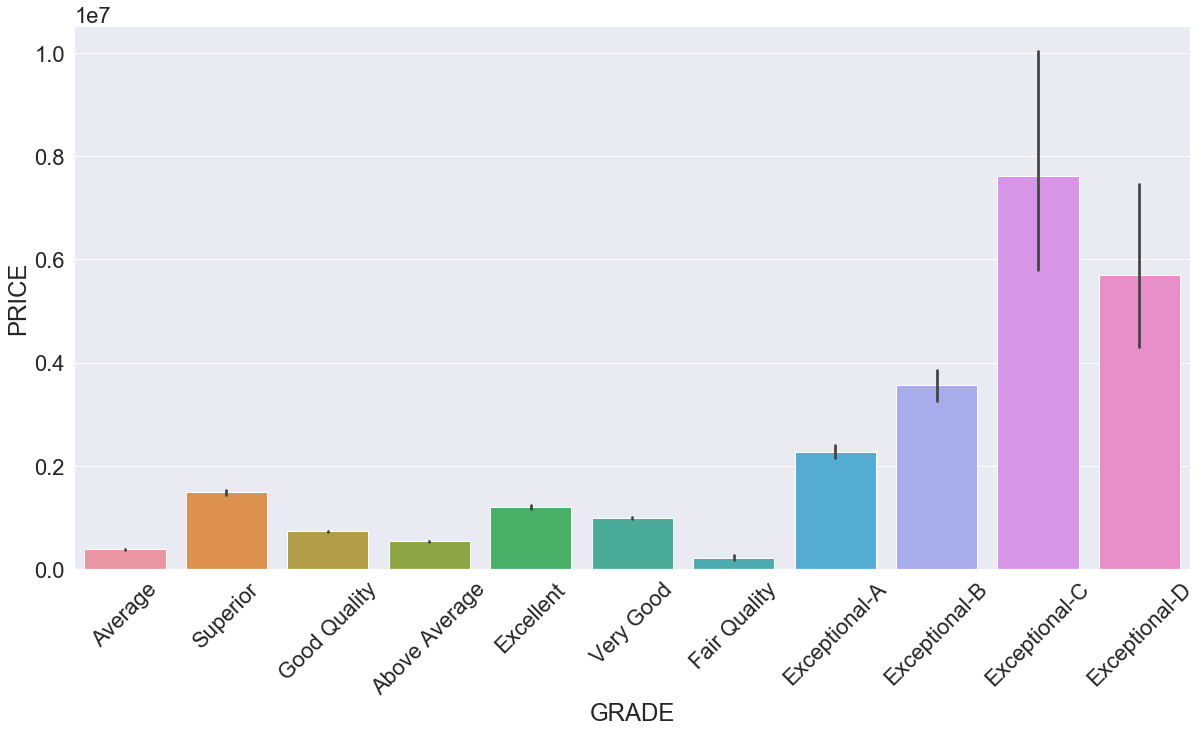

In [9]:
df_sorted= df.sort_values('PRICE')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10))
sns.barplot(y='PRICE', x='GRADE', data=df)
sns.set(font_scale=1) 
plt.xticks(rotation=45)